### 목표
- LinearRegression 사용하기
- 선형회귀 이해하기
- a(w 가중치), b(절편) 갱신하는 이론을 이해하고 실습하기

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 성적데이터 생성

In [50]:
data = pd.DataFrame([[2, 20], [4, 40], [8, 80], [9, 90]], index=['승재', '동주', '건도', '경령'], columns=['시간', '성적'])
data

,시간,성적
승재,2,20
동주,4,40
건도,8,80
경령,9,90


#### LinearRegression
- 수학 공식을 이용한 해석적 모델

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
# 모델 생성
linear_model = LinearRegression()

# 과대적합 제어하는 하이퍼 파라미터 없당

In [53]:
display(data[['시간']]) # DataFrame
display(data['시간']) # series

,시간
승재,2
동주,4
건도,8
경령,9


승재    2
동주    4
건도    8
경령    9
Name: 시간, dtype: int64

In [54]:
# 모델 학습
# data 시간 -> 문제   지금 문제의 특성이 1개라도 2차원으로 집어넣어야 한다 Series가 아니라 DataFrame으로 넣어야한다
# data 성적 -> 답

linear_model.fit(data[['시간']], data['성적'])

LinearRegression()

In [55]:
# 경고창 warning 무시하기
import warnings
warnings.filterwarnings(action='ignore')
# 필요하면 쓰자
# 경고하는 이유가 있을 테니까

In [56]:
# y = wx + b
# 모델 예측
linear_model.predict([[7]])

array([70.])

In [57]:
# 가중치, 절편 값 확인
print('가중치:', linear_model.coef_)
print('절편:', linear_model.intercept_) # 0 ?
# 7.105427357601002e-15 0 이나 마찬가지
# 실수의 과학적 표기법?

가중치: [10.]
절편: 7.105427357601002e-15


#### 경사하강법
- 가중치(w)에 따른 비용함수(cost:mse)의 변화 그래프?

In [58]:
# 가설 a, b 셋팅 y = ax + b
def h(w, x):
    return w*x + 0 # w값이 계속 변화. b는 매개변수로 받지 않고 0으로 고정하고 생각해보자. 일단은

In [59]:
# MSE : 평균제곱오차 구하는 함수 정의
def cost(data, target, weight):
    y_pre = h(weight, data)
    # 평균제곱오차
    mse = ((y_pre - target)**2).mean()
    return mse

In [60]:
# cost 호출 -> 오차 확인
# 1 w = 10

cost(data['시간'], data['성적'], 10)

0.0

In [61]:
cost(data['시간'], data['성적'], 20)

4125.0

In [62]:
cost(data['시간'], data['성적'], 30)

16500.0

In [63]:
cost(data['시간'], data['성적'], 5)

1031.25

In [64]:
cost(data['시간'], data['성적'], 0)

4125.0

In [65]:
# 최적의 a, b를 찾아야 한다
# 오차가 적을 때가 최적이다
# 경사 하강법 : a, b를 오차가 작아지는 방향으로 갱신하는 방법

In [66]:
weight_range = range(-10, 31)

# for문 돌려서 w에 따른 오차 출력
cost_list = [] # 오차 저장하는 리스트
for w in weight_range:
    mse = cost(data['시간'], data['성적'], w)
    cost_list.append(mse)
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

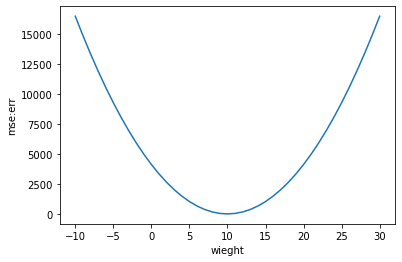

In [67]:
# x : 가중치 범위
# y : 오차
plt.plot(weight_range, cost_list)

plt.xlabel('wieght')
plt.ylabel('mse:err')
plt.show()

#### SGDRegressor 사용하기
- 경사하강을 적용한 모델

In [68]:
from sklearn.linear_model import SGDRegressor # 경사하강을 적용한 회귀 모델

In [123]:
sgd_model = SGDRegressor(max_iter=5000, # 가중치 업데이트 반복 횟수
                         eta0 = 0.074, # 학습률 learning rate 갱신 변동 폭
                         verbose=1,
                        random_state=213) # 학습과정 확인. 안보고 싶으면 0

In [124]:
# 학습
sgd_model.fit(data[['시간']], data['성적'])
# norm = a, bias = b
# loss = cost = mse = 오차

-- Epoch 1
Norm: 6.95, NNZs: 1, Bias: -0.381670, T: 4, Avg. loss: 1357.904934
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 7.32, NNZs: 1, Bias: 0.184609, T: 8, Avg. loss: 29.716354
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 7.44, NNZs: 1, Bias: 0.101607, T: 12, Avg. loss: 84.382568
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 7.60, NNZs: 1, Bias: 0.475493, T: 16, Avg. loss: 30.657867
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 8.05, NNZs: 1, Bias: 0.489726, T: 20, Avg. loss: 61.109703
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 8.36, NNZs: 1, Bias: 0.757497, T: 24, Avg. loss: 18.979967
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 8.89, NNZs: 1, Bias: 0.798676, T: 28, Avg. loss: 25.379805
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.13, NNZs: 1, Bias: 0.930603, T: 32, Avg. loss: 5.978402
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.51, NNZs: 1, Bias: 0.954789, T: 36, Avg. loss: 6.133876
Total training time: 0.00 seconds.
--

SGDRegressor(eta0=0.074, max_iter=5000, random_state=213, verbose=1)

In [45]:
# 경사하강은 a, b를 갱신하는데 오차가 점점 작아지는 방향으로 학습함

In [125]:
# 예측
sgd_model.predict([[7]])

# 회귀는 결과의 미묘한 차이를 무시해도 좋다

array([70.11861049])

In [126]:
# 평가
# 예측 확률
# r2_score
# R2
# R-Squared
# 1에 가까울수록 데이터 포이트를 잘 나타내고 있다
# 0에 가까울수록 형편없다는 뜻
sgd_model.score(data[['시간']], data['성적'])

0.9999641404327458